In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
from google.colab import drive
drive.mount('/content/drive')
np.random.seed(1)

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Projects/DUI/processed_data.csv',index_col = False)
#df = df.iloc[:,:-1]
df
my_dict = {0:'Low', 1:'High'}
df = df.replace({'Risk Level':my_dict})
df

,Alcohol-Impaired Driving Deaths %,Adult Obesity %,Food Environment Index (0-10),Physically Inactive Adults %,Access to Exercise Opportunities %,Food Insecure %,Limited Access to Healthy Foods %,Insufficient Sleep % (Avg Hours < 7),Uninsured Adults % (Age < 65),Some College % (Adults 25-44),...,Severe Housing Problems %,Drive Alone to Work %,Drive Alone Long Commute % (Minutes > 30),Homeowners %,Broadband Internet Access %,High School Completion % (Adults >= 25),white_not_hispanic %,per_capita_income,age_over_65 %,Risk Level
0,32,35,6.5,32,63,16,13,38,12,61,...,15,87,41,75,83,89,74.6,29819,15.0,High
1,32,30,7.4,28,75,13,8,36,14,66,...,12,83,38,77,85,90,83.1,32626,20.0,High
2,38,40,5.7,42,50,21,10,41,17,38,...,15,84,37,62,65,75,45.8,18473,18.6,High
3,21,41,7.6,38,11,16,0,40,14,38,...,11,88,55,75,76,81,74.5,20778,15.9,High
4,15,39,7.8,33,23,15,3,39,18,56,...,10,88,60,76,80,83,86.9,24747,17.9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,40,26,8.1,23,45,12,4,33,16,66,...,6,70,27,83,88,95,89.3,35874,17.8,High
2654,18,34,8.1,25,83,11,5,35,16,62,...,10,76,19,75,87,93,79.6,32603,11.4,Low
2655,17,30,8.3,28,79,13,1,36,16,58,...,11,79,18,77,91,93,87.5,28159,13.0,Low
2656,0,29,8.3,26,76,12,3,32,18,62,...,8,84,8,73,83,92,81.9,28101,21.1,Low


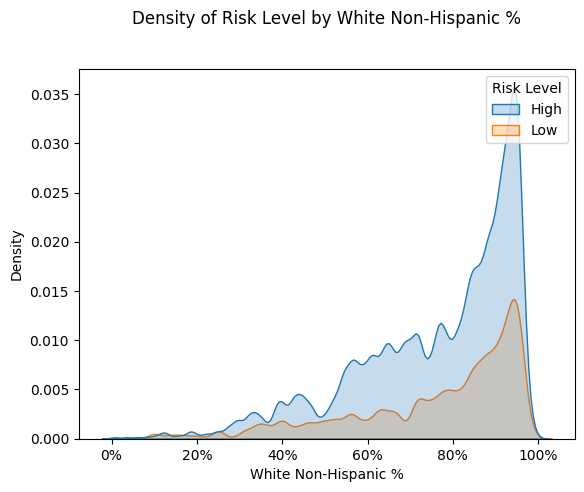

In [9]:
ax = sns.kdeplot(x ='white_not_hispanic %', hue = "Risk Level", data = df, fill = True, bw_adjust=.25)
ax.set_xlabel('White Non-Hispanic %')
ax.set_title('Density of Risk Level by White Non-Hispanic %', y=1.10)
#ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#A histogram aims to approximate the underlying probability density function that generated the data by binning and
# counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

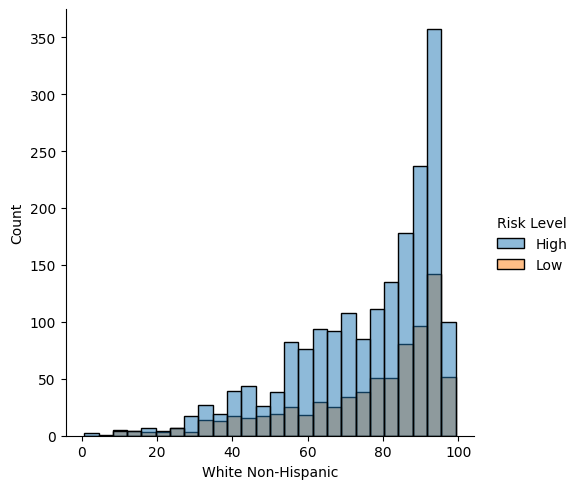

In [11]:
ax = sns.displot(df, x="white_not_hispanic %", hue="Risk Level")
ax.set(xlabel='White Non-Hispanic', ylabel='Count')
plt.show()
#as white non hispanic increases so does risk level and there is a big dispersion. In areas with low non hispanic white <20 are not that risky and dispersion is not visible.

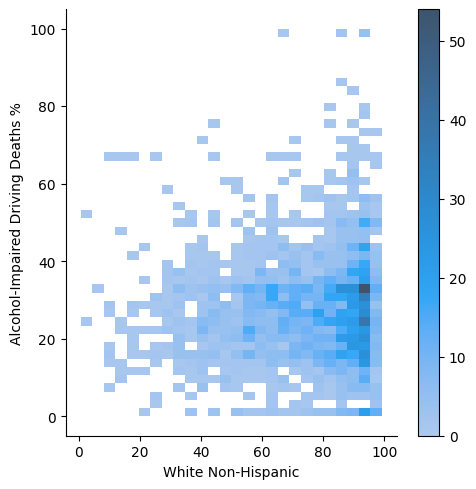

In [18]:
ax = sns.displot(df, x="white_not_hispanic %", y="Alcohol-Impaired Driving Deaths %",cbar=True) #cbar tells counts vs color intensity
#Visualizing bivariate distributions - non hispanic white vs actual Alcohol-Impaired Driving Deaths % is higher on 60-100% area in general
ax.set(xlabel='White Non-Hispanic')
plt.show()

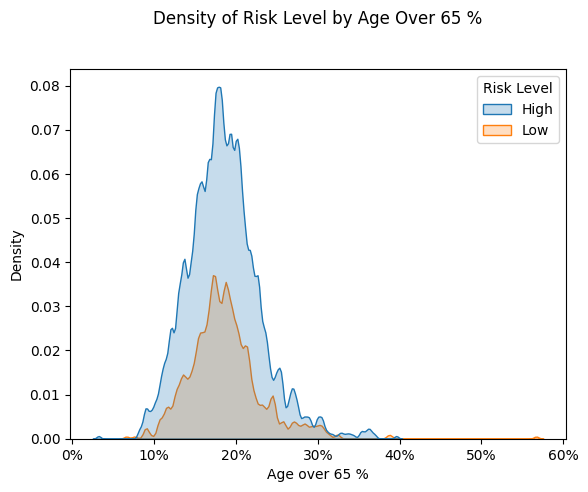

In [19]:
ax = sns.kdeplot(x ='age_over_65 %', hue = "Risk Level", data = df,fill= True, bw_adjust=.25)
ax.set_xlabel('Age over 65 %')
ax.set_title('Density of Risk Level by Age Over 65 %', y=1.10)
#ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


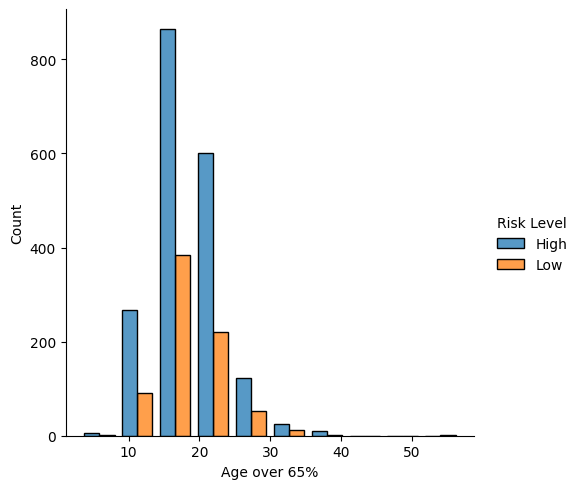

In [21]:
ax=sns.displot(df, x="age_over_65 %", hue="Risk Level", multiple='dodge', bins = 10,shrink=.8)
#areas with around 20% people 65+ were more frequent and risk level dispersion was high.
ax.set(xlabel='Age over 65%', ylabel='Count')
plt.show()

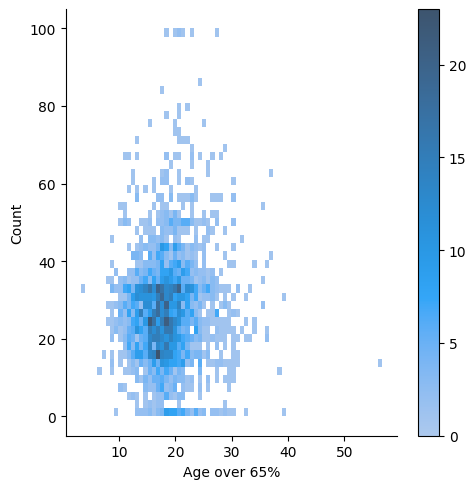

In [22]:
ax = sns.displot(df, x="age_over_65 %", y="Alcohol-Impaired Driving Deaths %", cbar=True) #cbar tells counts vs color intensity)
#Visualizing bivariate distributions - in general death percentage is higer on 20-30 % of people 65+; more than 30% 65+ means less alcohol driving death.
ax.set(xlabel='Age over 65%', ylabel='Count')
plt.show()

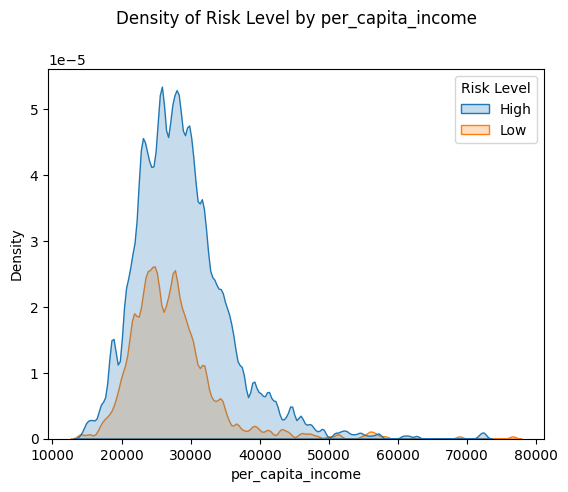

In [25]:
ax = sns.kdeplot(x ='per_capita_income', hue = "Risk Level", data = df, fill= True, bw_adjust=.25)
ax.set_xlabel('per_capita_income')
ax.set_title('Density of Risk Level by per_capita_income', y=1.10)
#ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
#ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

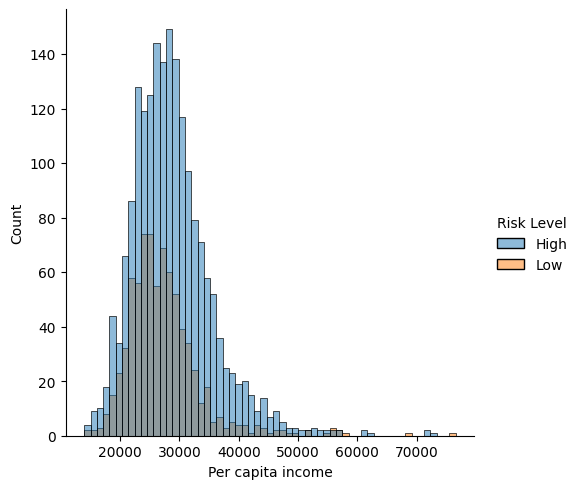

In [23]:
#sns.pairplot(df, hue="Risk Level")
ax = sns.displot(df, x="per_capita_income", hue="Risk Level")
#rich area 70k+ a bit risky; 55-60k area kind of neutral - kind of equal high and low.
#areas with 25-35k was most counties in and the dispersion was high
ax.set(xlabel='Per capita income', ylabel='Count')
plt.show()

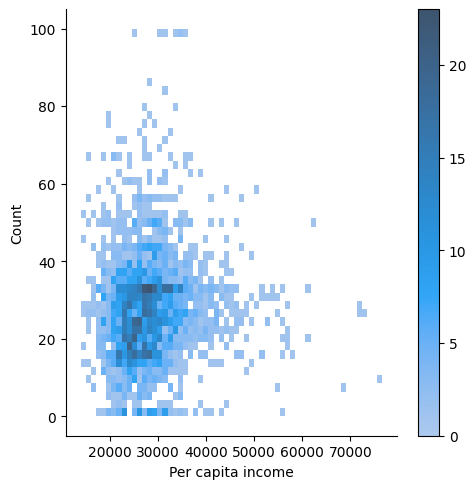

In [24]:
ax = sns.displot(df, x="per_capita_income", y="Alcohol-Impaired Driving Deaths %",cbar=True) #cbar tells counts vs color intensity
#Visualizing bivariate distributions -
ax.set(xlabel='Per capita income', ylabel='Count')
plt.show()

<Axes: >

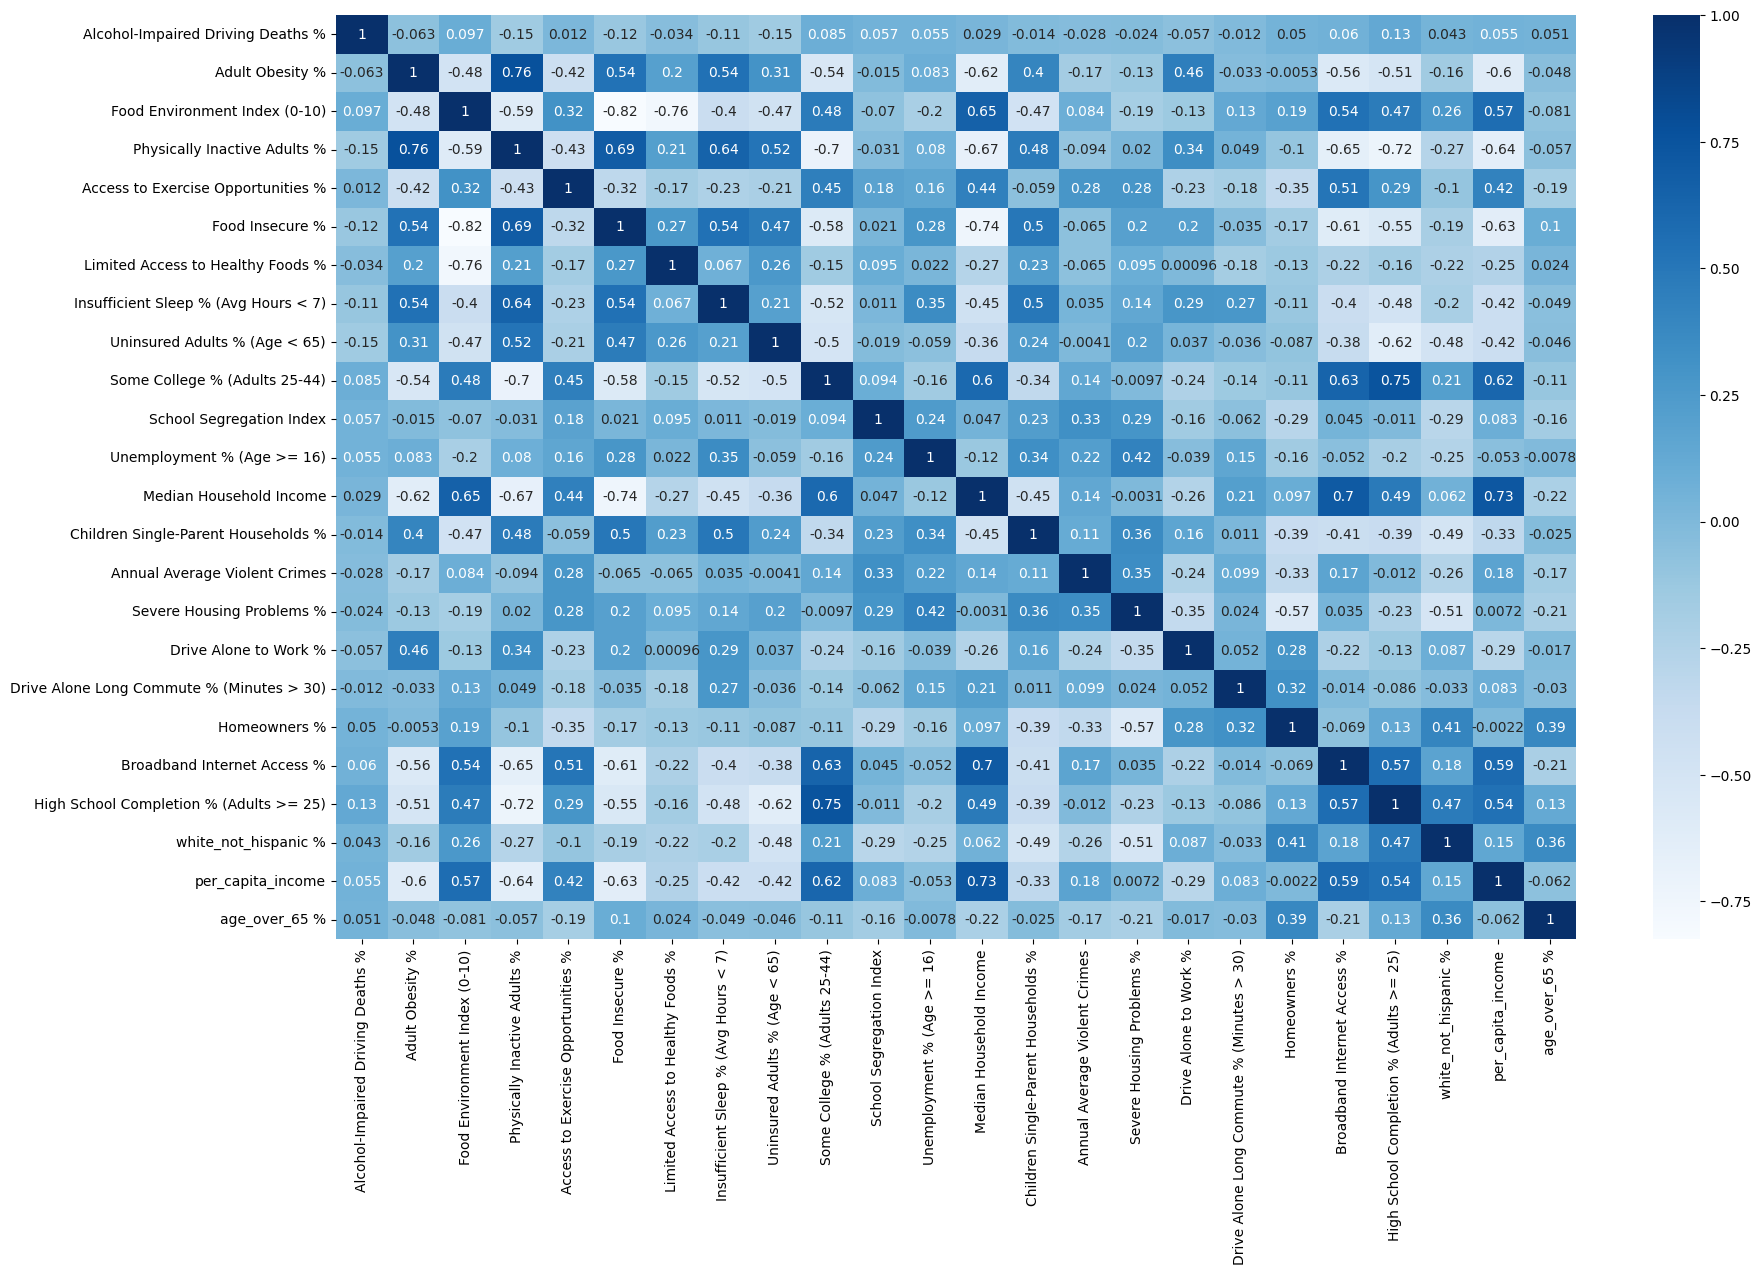

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [ ]:
df.columns

Index(['Alcohol-Impaired Driving Deaths %', 'Adult Obesity %',
       'Food Environment Index (0-10)', 'Physically Inactive Adults %',
       'Access to Exercise Opportunities %', 'Food Insecure %',
       'Limited Access to Healthy Foods %',
       'Insufficient Sleep % (Avg Hours < 7)', 'Uninsured Adults % (Age < 65)',
       'Some College % (Adults 25-44)', 'School Segregation Index',
       'Unemployment % (Age >= 16)', 'Median Household Income',
       'Children Single-Parent Households %', 'Annual Average Violent Crimes',
       'Severe Housing Problems %', 'Drive Alone to Work %',
       'Drive Alone Long Commute % (Minutes > 30)', 'Homeowners %',
       'Broadband Internet Access %',
       'High School Completion % (Adults >= 25)', 'white_not_hispanic %',
       'per_capita_income', 'age_over_65 %', 'Risk Level'],
      dtype='object')

In [15]:
df= df.drop([  'Adult Obesity %',
       'Food Environment Index (0-10)', 'Physically Inactive Adults %',
       'Access to Exercise Opportunities %', 'Food Insecure %',
       'Limited Access to Healthy Foods %',
       'Insufficient Sleep % (Avg Hours < 7)', 'Uninsured Adults % (Age < 65)',
       'Some College % (Adults 25-44)', 'School Segregation Index',
       'Unemployment % (Age >= 16)', 'Median Household Income',
       'Children Single-Parent Households %', 'Annual Average Violent Crimes',
       'Severe Housing Problems %', 'Drive Alone to Work %',
       'Drive Alone Long Commute % (Minutes > 30)', 'Homeowners %',
       'Broadband Internet Access %',
       'High School Completion % (Adults >= 25)'], axis=1)

In [16]:
df


,Alcohol-Impaired Driving Deaths %,white_not_hispanic %,per_capita_income,age_over_65 %,Risk Level
0,32,74.6,29819,15.0,High
1,32,83.1,32626,20.0,High
2,38,45.8,18473,18.6,High
3,21,74.5,20778,15.9,High
4,15,86.9,24747,17.9,Low
...,...,...,...,...,...
2653,40,89.3,35874,17.8,High
2654,18,79.6,32603,11.4,Low
2655,17,87.5,28159,13.0,Low
2656,0,81.9,28101,21.1,Low


<Axes: >

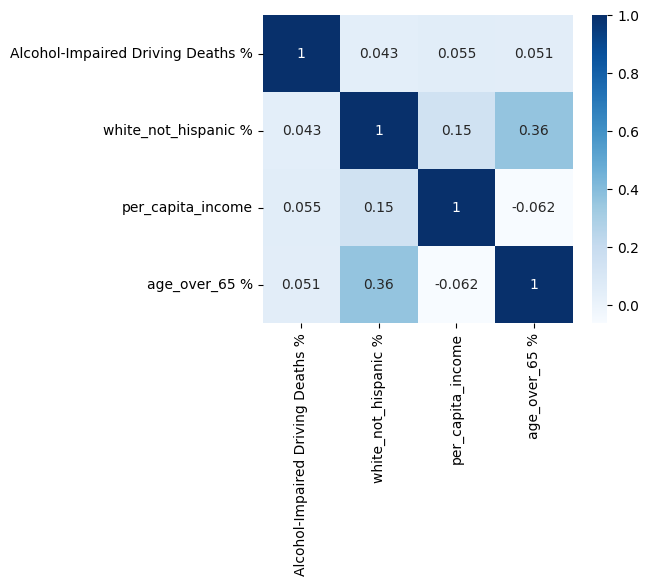

In [17]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')